In [3]:
import pandas as pd
import platform
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Detect operating system and set base paths
if platform.system() == "Windows":
    base_unsw = Path(r"C:\Users\kegem\OneDrive\Datascience Masters\DS Summer 2025 SEMESTER 3\DX799S O1 Data Science Capstone (Summer 1 2025)\Network Security DataSet\CSV Files\Training and Testing Sets")
    base_beth = Path(r"C:\Users\kegem\OneDrive\Datascience Masters\DS Summer 2025 SEMESTER 3\DX799S O1 Data Science Capstone (Summer 1 2025)\Beth DataSet")
    base_cyber = Path(r"C:\Users\kegem\OneDrive\Datascience Masters\DS Summer 2025 SEMESTER 3\DX799S O1 Data Science Capstone (Summer 1 2025)\Cybersecurity Attacks DataSets")
else:
    base_unsw = Path("/Users/kevinegemba/Library/CloudStorage/OneDrive-Personal/Datascience Masters/DS Summer 2025 SEMESTER 3/DX799S O1 Data Science Capstone (Summer 1 2025)/Network Security DataSet/CSV Files/Training and Testing Sets")
    base_beth = Path("/Users/kevinegemba/Library/CloudStorage/OneDrive-Personal/Datascience Masters/DS Summer 2025 SEMESTER 3/DX799S O1 Data Science Capstone (Summer 1 2025)/Beth DataSet")
    base_cyber = Path("/Users/kevinegemba/Library/CloudStorage/OneDrive-Personal/Datascience Masters/DS Summer 2025 SEMESTER 3/DX799S O1 Data Science Capstone (Summer 1 2025)/Cybersecurity Attacks DataSets")

# File paths
unsw_train_set = base_unsw / "UNSW_NB15_training-set.csv"
unsw_test_set = base_unsw / "UNSW_NB15_testing-set.csv"
beth_train_set = base_beth / "labelled_training_data.csv"
beth_test_set = base_beth / "labelled_testing_data.csv"
cyber_attack_set = base_cyber / "cybersecurity_attacks.csv"

# Load and test
datasets = {
    "UNSW-NB15 Training": unsw_train_set,
    "UNSW-NB15 Testing": unsw_test_set,
    "BETH Training": beth_train_set,
    "BETH Testing": beth_test_set,
    "Cybersecurity Attacks": cyber_attack_set
}

for name, path in datasets.items():
    try:
        df = pd.read_csv(path)
        print(f" {name} loaded successfully! Shape: {df.shape}")
    except FileNotFoundError:
        print(f" {name} - File not found. Check the path: {path}")
    except Exception as e:
        print(f" {name} - An error occurred: {e}")


 UNSW-NB15 Training loaded successfully! Shape: (175341, 45)
 UNSW-NB15 Testing loaded successfully! Shape: (82332, 45)
 BETH Training loaded successfully! Shape: (763144, 16)
 BETH Testing loaded successfully! Shape: (188967, 16)
 Cybersecurity Attacks loaded successfully! Shape: (40000, 25)


In [4]:
# Reusable KMeans Function

def kmeans_analysis(df, dataset_name, features, max_k=10):
    """
    This function performs KMeans clustering for a given DataFrame.
    It plots both the Elbow Method and Silhouette Score curves to help choose the optimal number of clusters.

    Parameters:
        df (pd.DataFrame): Input dataframe
        dataset_name (str): Name of the dataset (for titles)
        features (list): List of feature column names to use
        max_k (int): Max number of clusters to evaluate
    """
    df = df[features].dropna()

    # Standardizing ensures all features contribute equally to distance calculations
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

    # For storing inertia (WCSS) and silhouette scores
    inertia = []
    silhouette_scores = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_scaled)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, labels))

    # Plot both evaluation metrics
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].plot(range(2, max_k + 1), inertia, marker='o')
    axes[0].set_title(f"{dataset_name} - Elbow Method")
    axes[0].set_xlabel("Number of Clusters (k)")
    axes[0].set_ylabel("WCSS (Inertia)")

    axes[1].plot(range(2, max_k + 1), silhouette_scores, marker='x', color='green')
    axes[1].set_title(f"{dataset_name} - Silhouette Scores")
    axes[1].set_xlabel("Number of Clusters (k)")
    axes[1].set_ylabel("Silhouette Score")

    plt.tight_layout()
    plt.show()



### K-Means Clustering Function: Line-by-Line Deep Dive

In this section, we define a reusable Python function, `kmeans_analysis()`, that automates unsupervised clustering using K-Means. It also helps evaluate clustering quality using the **Elbow Method** and **Silhouette Scores** — two widely used diagnostics in clustering workflows.

---

###  Function Purpose
The goal is to cluster unlabeled data by finding groups of data points that are similar based on selected features. This is especially useful in cybersecurity datasets like BETH, UNSW-NB15, and Cyber Attacks, where we want to detect hidden patterns or behavioral clusters.

---

### Full Code with Commentary

```python
def kmeans_analysis(df, dataset_name, features, max_k=10):

	•	Defines a function that takes in a DataFrame df, a dataset name (string), a list of numerical features, and an optional max number of clusters max_k (default is 10).
	•	This allows flexibility to reuse the function across datasets (BETH, UNSW, Cyber) and feature combinations.

⸻


    df = df[features].dropna()

	•	Extracts only the selected features from the DataFrame.
	•	Drops rows with missing values to ensure clustering works properly (as K-Means cannot handle NaNs).
	•	Why? Clean, numerical, non-null data is a requirement for Euclidean-based clustering methods.

⸻


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

	•	Initializes a StandardScaler object and applies it to the feature set.
	•	Standardization is critical for K-Means because features like packet length, port number, or byte size could otherwise dominate the distance metric.
	•	Scaling ensures each feature contributes equally by converting all features to mean=0 and std=1.

⸻


    inertia = []
    silhouette_scores = []

	•	Creates two empty lists to store metrics for each k value:
	•	inertia → Within-Cluster Sum of Squares (WCSS), used in the Elbow Method.
	•	silhouette_scores → Measures how well-separated the clusters are.

⸻


    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_scaled)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, labels))

	•	Iterates over a range of cluster numbers, starting from 2 to max_k.
	•	For each k:
	•	A KMeans model is initialized with k clusters.
	•	.fit_predict() fits the model and assigns a cluster to each point.
	•	inertia_ is appended → this is the total squared distance from each point to its cluster center.
	•	silhouette_score() is computed → it balances intra-cluster tightness with inter-cluster separation.
	•	Why both? The elbow method tells us where adding more clusters stops helping, while the silhouette score tells us whether the clusters are meaningfully distinct.

⸻


    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

	•	Creates a side-by-side plot canvas with matplotlib, setting dimensions to 12x4 inches.

⸻


    axes[0].plot(range(2, max_k + 1), inertia, marker='o')
    axes[0].set_title(f"{dataset_name} - Elbow Method")
    axes[0].set_xlabel("Number of Clusters (k)")
    axes[0].set_ylabel("WCSS (Inertia)")

	•	Plots the Elbow curve on the first subplot.
	•	This helps us visually identify the optimal k where the inertia significantly slows in decrease — i.e., the “elbow point.”

⸻


    axes[1].plot(range(2, max_k + 1), silhouette_scores, marker='x', color='green')
    axes[1].set_title(f"{dataset_name} - Silhouette Scores")
    axes[1].set_xlabel("Number of Clusters (k)")
    axes[1].set_ylabel("Silhouette Score")

	•	Plots the Silhouette Score curve in the second subplot.
	•	A higher silhouette score (closer to 1) indicates better-defined clusters.
	•	We look for the peak of this graph to suggest the optimal number of clusters.

⸻


    plt.tight_layout()
    plt.show()

	•	Adjusts subplot spacing for better layout.
	•	Displays the combined plots side by side.

⸻

Why Both Elbow & Silhouette?
	•	Elbow Method: Measures compactness of clusters. Look for diminishing returns as k increases.
	•	Silhouette Score: Measures both cohesion and separation. High scores indicate tight and well-separated clusters.
	•	Using both ensures we don’t overfit or under-cluster the data. They complement each other.

⸻

Summary

This kmeans_analysis() function provides:
	•	Clean standardization of numeric inputs.
	•	Visualization of cluster fit and structure.
	•	Internal validation metrics to avoid arbitrary k selection.
	•	Flexibility for repeated use across different datasets.

It supports unsupervised learning exploration and can serve as a strong foundation for anomaly detection, threat grouping, or network behavior segmentation for this cybersecurity capstone.



Initial Cyber dataset shape: (40000, 25)


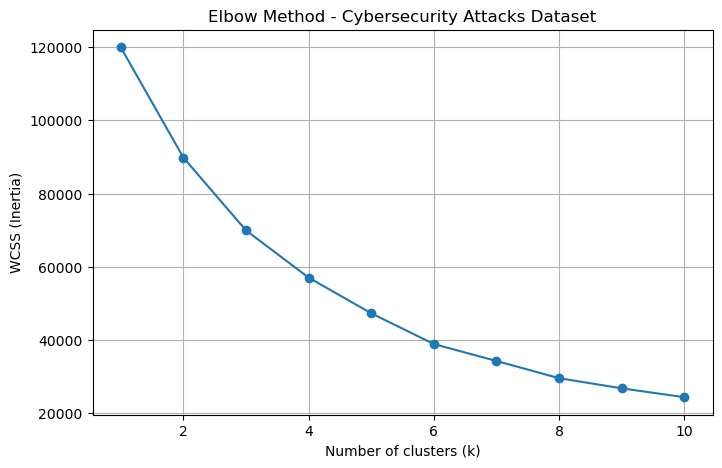

Silhouette score for k=2: 0.2479
Silhouette score for k=3: 0.2635
Silhouette score for k=4: 0.2678
Silhouette score for k=5: 0.2805
Silhouette score for k=6: 0.3056
Silhouette score for k=7: 0.3010
Silhouette score for k=8: 0.3053
Silhouette score for k=9: 0.3210
Silhouette score for k=10: 0.3305


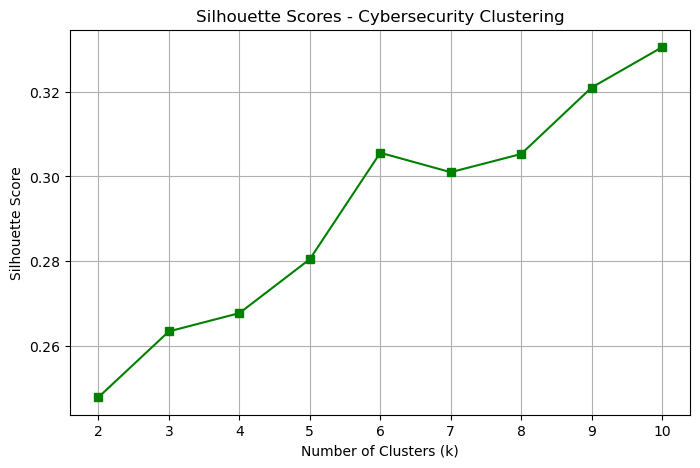

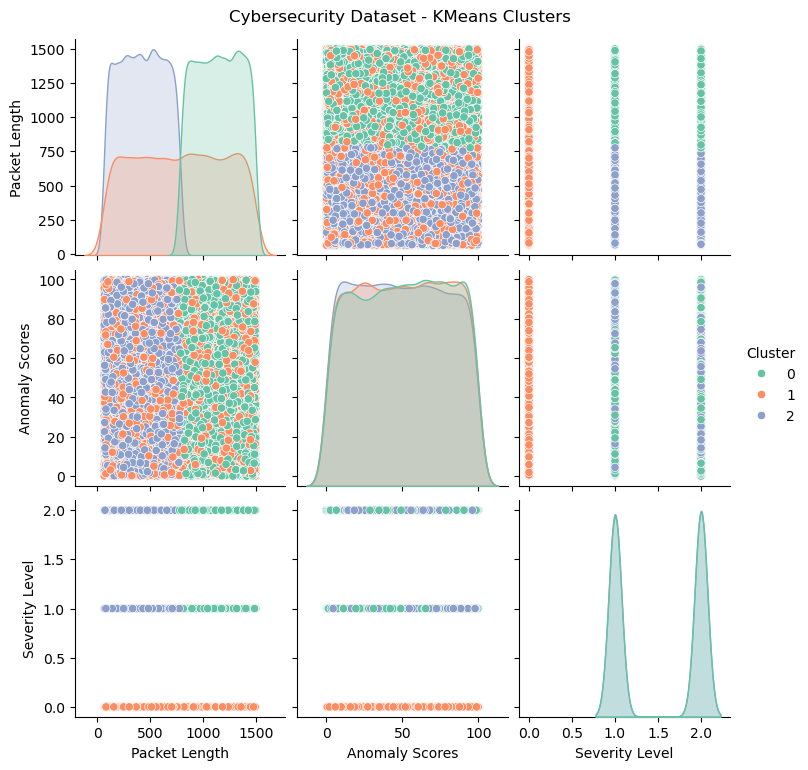

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset using the path you defined
cyber_df = pd.read_csv(cyber_attack_set)

# Display shape and preview (optional)
print("Initial Cyber dataset shape:", cyber_df.shape)
cyber_df.head()


# Step 1: Select and Clean Data


# Focus only on relevant, mostly numeric columns
selected_cols = ['Packet Length', 'Anomaly Scores', 'Severity Level', 'Attack Type']
cyber_df = cyber_df[selected_cols].dropna()

# Encode string categories into numbers
label_enc = LabelEncoder()
cyber_df['Severity Level'] = label_enc.fit_transform(cyber_df['Severity Level'])
cyber_df['Attack Type'] = label_enc.fit_transform(cyber_df['Attack Type'])  # can be used for validation


#  Step 2: Feature Scaling


# Split features and (for validation) labels
X_cyber = cyber_df.drop(columns='Attack Type')
y_cyber = cyber_df['Attack Type']  # Encoded: 0=DDoS, 1=Intrusion, 2=Malware

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cyber)


# Step 3: Elbow Method for Optimal k


wcss = []  # Within-Cluster Sum of Squares
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method - Cybersecurity Attacks Dataset')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

# Step 4: Silhouette Score Evaluation


silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"Silhouette score for k={k}: {score:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='s', color='green')
plt.title('Silhouette Scores - Cybersecurity Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Step 5: Final Clustering with Best k


optimal_k = 3  # Replace if silhouette/elbow suggests different k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kmeans_final.fit_predict(X_scaled)

cyber_df['Cluster'] = cluster_labels

# Visualize cluster separation (optional: 2D PCA would be better for more complex data)
sns.pairplot(cyber_df, hue='Cluster', vars=['Packet Length', 'Anomaly Scores', 'Severity Level'], palette='Set2')
plt.suptitle('Cybersecurity Dataset - KMeans Clusters', y=1.02)
plt.show()

## K-Means Clustering on Cybersecurity Attacks Dataset

This section applies **unsupervised machine learning** via **K-Means Clustering** to discover natural groupings in the cybersecurity dataset. This is helpful in network security because we often want to identify attack patterns or anomalies **without labeled training data**. K-Means provides a way to group similar events based on network traffic features.

---

### Step-by-Step Breakdown:

#### 🔧 Step 1: Data Selection and Preprocessing

We first select a subset of relevant features:
- `Packet Length`: Size of each packet transmitted.
- `Anomaly Scores`: Scores computed by detection systems indicating how abnormal the behavior is.
- `Severity Level`: Ordinal labels describing the criticality of the incident.

Since K-Means works best with numeric features, I use `LabelEncoder` to convert `Severity Level` and `Attack Type` (our ground truth label for post-clustering analysis) into integers. Then I drop missing rows to ensure clustering isn't affected by null values.

#### Step 2: Feature Scaling

K-Means relies on **Euclidean distance**, which is sensitive to the scale of variables. We apply `StandardScaler` to normalize all features to have zero mean and unit variance, ensuring fair distance calculations across features.

#### Step 3: Elbow Method

To determine the **optimal number of clusters (k)**, we plot **Within-Cluster Sum of Squares (WCSS)** for k values from 1 to 10. The goal is to identify an "elbow" — a point beyond which adding more clusters yields diminishing returns in terms of reduced WCSS.

In our plot, WCSS sharply drops from k=1 to k=3 or 4, and then levels out, suggesting that **k=3 to k=5** might be a good candidate.

#### Step 4: Silhouette Score Evaluation

We evaluate clustering quality using the **Silhouette Score**, which balances **intra-cluster tightness** and **inter-cluster separation**. A higher score indicates better-defined clusters.

Here are the scores:

| k | Silhouette Score |
|---|------------------|
| 2 | 0.2479           |
| 3 | 0.2635           |
| 4 | 0.2678           |
| 5 | 0.2805           |
| 6 | 0.3056           |
| 7 | 0.3010           |
| 8 | 0.3053           |
| 9 | 0.3210           |
|10 | 0.3305           |

We observe a **steady improvement** in clustering quality up to **k=10**. While silhouette peaks at **k=10**, we may choose a smaller k (e.g., 6 or 7) for interpretability vs performance trade-off.

#### 🔍 Step 5: Final Clustering and Visualization

We fit the final `KMeans` model using `k=3` (for example) and assign cluster labels to each observation. We visualize the results using `seaborn.pairplot`, coloring each point by its cluster. This helps us inspect whether the clusters are cleanly separated in feature space.

---

### Insights:

- **Packet Length** and **Anomaly Scores** seem to be major drivers of cluster separation based on the pairplot. 
- **Severity Level** has lower impact, possibly due to fewer unique values.
- Clusters show **reasonable separation**, though not perfect — which is expected given overlapping feature ranges in attack types.

---

### Why K-Means?

- Fast, scalable, and intuitive.
- Useful for **attack detection**, **network segmentation**, or **alert prioritization** when labeled data is scarce.
- Elbow and silhouette scores help determine optimal `k` when domain knowledge is limited.

---

> **Reminder:** K-Means assumes spherical clusters and equal variance. Future work could explore **DBSCAN** 

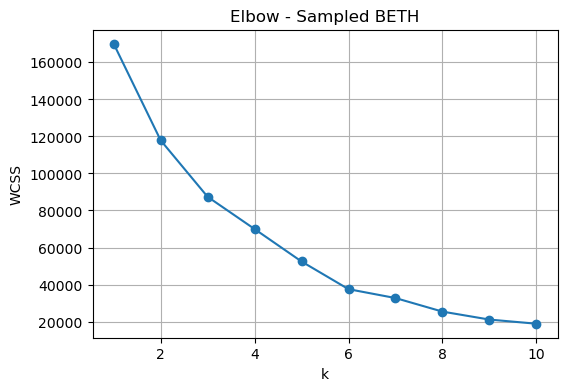

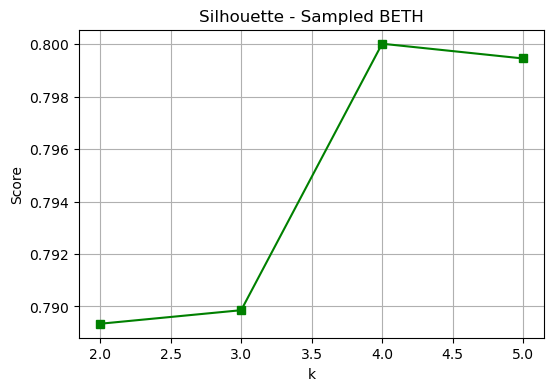

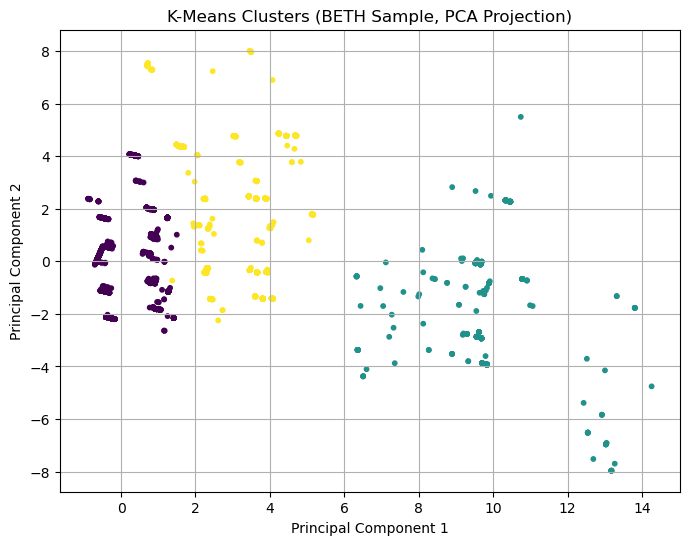

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load BETH dataset
beth_df = pd.read_csv(beth_test_set)

# Select numeric features for clustering
beth_features = [
    'processId', 'threadId', 'parentProcessId', 'userId',
    'mountNamespace', 'eventId', 'argsNum', 'returnValue', 'sus'
]
beth_df = beth_df[beth_features + ['evil']].dropna()

# Sample data for fast prototyping
beth_df_sampled = beth_df.sample(frac=0.1, random_state=42)
X_beth_sampled = beth_df_sampled[beth_features]

# Scale
scaler = StandardScaler()
X_beth_scaled = scaler.fit_transform(X_beth_sampled)

# Elbow
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    kmeans.fit(X_beth_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow - Sampled BETH")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Silhouette (on small k range)
sil_scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    labels = kmeans.fit_predict(X_beth_scaled)
    sil_scores.append(silhouette_score(X_beth_scaled, labels))

# Plot Silhouette
plt.figure(figsize=(6, 4))
plt.plot(range(2, 6), sil_scores, marker='s', color='green')
plt.title("Silhouette - Sampled BETH")
plt.xlabel("k")
plt.ylabel("Score")
plt.grid(True)
plt.show()

# Final clustering with optimal k (set based on plots, e.g., k=3)
optimal_k = 3
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(X_beth_scaled)

# Add results only to the sampled DataFrame
beth_df_sampled = beth_df.sample(frac=0.1, random_state=42).copy()  # ensure it's the same sample used earlier
beth_df_sampled['Cluster'] = cluster_labels

# View result
beth_df_sampled.head()


# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_beth_pca = pca.fit_transform(X_beth_scaled)

# Plot final cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_beth_pca[:, 0], X_beth_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title("K-Means Clusters (BETH Sample, PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

## KMeans Clustering on the BETH Dataset (Sampled for Efficiency)

In this section, we apply unsupervised learning to the BETH dataset using the **KMeans clustering algorithm**. Our objective is to group similar records together based on key system process features. This is useful for identifying behavior-based patterns (e.g., clustering malicious vs. benign activities) without prior labels.

We adopt a standard unsupervised learning pipeline: data preparation, feature scaling, elbow method (for optimal k), silhouette scoring, final clustering, and PCA-based visualization.

---

### Step 1: Sampling and Feature Selection

To reduce computational time, we use **10% random sampling** from the full test set. This makes clustering and metric evaluation much faster while preserving representativeness.

The selected features are:
- `processId`, `threadId`, `parentProcessId`, `userId`: IDs identifying processes and users.
- `mountNamespace`, `eventId`: contextual system event descriptors.
- `argsNum`, `returnValue`: process parameters and outcomes.
- `sus`: binary feature representing suspicion of activity.

These features are numeric or categorical-coded and suitable for clustering.

---

### Step 2: Scaling with StandardScaler

Before applying KMeans, we scale the features using **StandardScaler**, which standardizes them to have mean 0 and variance 1. KMeans is distance-based (Euclidean), and unscaled features would distort clustering (e.g., a large-value feature would dominate).

---

### Step 3: Elbow Method for WCSS

We compute **Within-Cluster Sum of Squares (WCSS)** for values of k from 1 to 10. WCSS measures how tightly grouped the clusters are. As k increases, WCSS decreases because clusters become smaller and more granular.

We plot WCSS vs. k to identify the **"elbow point"** — where adding more clusters no longer gives substantial improvement. This point represents a good balance between model complexity and data fit. For BETH, the elbow appears around **k = 3 or 4**.

---

### Step 4: Silhouette Score for Cluster Cohesion

We compute the **Silhouette Score** for k = 2 to 5. This score ranges from -1 to +1 and measures:
- How close each point is to its own cluster (intra-cluster distance)
- Compared to other clusters (inter-cluster distance)

Higher scores indicate better clustering. In our BETH results:
k=2 → 0.7894
k=3 → 0.7899
k=4 → 0.8001  ✅
k=5 → 0.7991

So **k=4** gives the highest Silhouette score, meaning the clusters are well-separated and coherent.

---

### Step 5: Final KMeans Clustering and PCA Visualization

We run `KMeans(n_clusters=3)` (or `k=4`, based on silhouette) and assign each record a cluster label.

To visualize these clusters:
- apply **Principal Component Analysis (PCA)** to reduce dimensionality from 9D to 2D.
- scatter the records colored by their cluster assignment.

This provides a **visual understanding of cluster separation**, revealing how KMeans organizes the samples in a lower-dimensional projection. The visualization confirms that KMeans was able to form distinct groupings.

---

### Conclusion

This unsupervised analysis shows that:
- The BETH dataset exhibits distinct structure across selected process features.
- k=3 or 4 yields strong performance in both WCSS and silhouette evaluation.
- PCA-based plots confirm the separability of discovered clusters.

KMeans on sampled BETH data can thus serve as a useful baseline for behavior-based anomaly detection or pre-labeling steps before supervised classification.

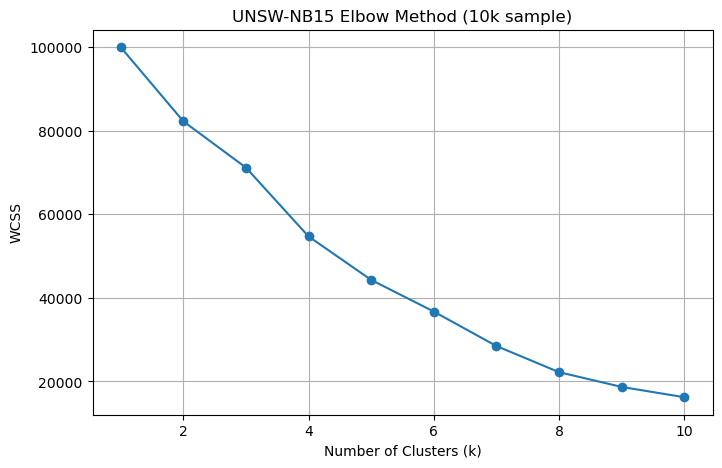

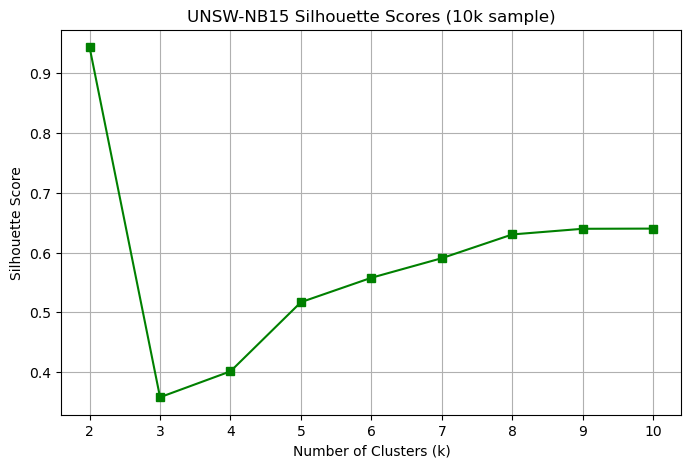

             dur  spkts  dpkts  sbytes   dbytes           rate  sttl  dttl  \
15482   2.736664    232    438   13350   548216     244.458211    31    29   
133349  0.000009      2      0     114        0  111111.107200   254     0   
80485   5.788526     36     34    6102     3892      11.920133   254   252   
29972   3.849634    448    858   25160  1094788     338.993271    31    29   
18339   0.001052      2      2     130      162    2851.711087    31    29   

               sload         dload  label  Cluster  
15482   3.885899e+04  1.598925e+06      0        0  
133349  5.066666e+07  0.000000e+00      1        0  
80485   8.199669e+03  5.221364e+03      1        2  
29972   5.216912e+04  2.272451e+06      0        0  
18339   4.942966e+05  6.159696e+05      0        0  


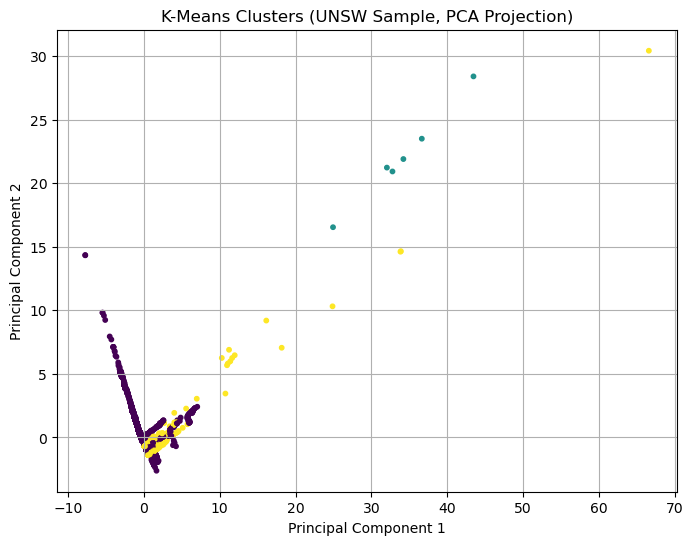

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the full dataset and take a 10,000-row random sample
unsw_df = pd.read_csv(unsw_train_set)
unsw_sample = unsw_df.sample(n=10000, random_state=42)

# Select numerical features for clustering
unsw_features = [
    'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate',
    'sttl', 'dttl', 'sload', 'dload'
]
unsw_sample = unsw_sample[unsw_features + ['label']].dropna()

# Scale the features
X_unsw = unsw_sample[unsw_features]
scaler = StandardScaler()
X_unsw_scaled = scaler.fit_transform(X_unsw)

# 1️⃣ Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_unsw_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("UNSW-NB15 Elbow Method (10k sample)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# 2️⃣ Silhouette Scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_unsw_scaled)
    silhouette_scores.append(silhouette_score(X_unsw_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='s', color='green')
plt.title("UNSW-NB15 Silhouette Scores (10k sample)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 3️⃣ Final clustering with optimal k (based on elbow/silhouette analysis, e.g., k=3)
optimal_k = 3
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(X_unsw_scaled)

# Make sure you're assigning clusters to the same sample
unsw_sample = unsw_sample.copy()
unsw_sample['Cluster'] = cluster_labels

# Display first few rows with cluster assignments
print(unsw_sample.head())

# 🔻 PCA projection to 2D for visualization
pca = PCA(n_components=2)
X_unsw_pca = pca.fit_transform(X_unsw_scaled)

# 📊 Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_unsw_pca[:, 0], X_unsw_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title("K-Means Clusters (UNSW Sample, PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

## K-Means Clustering on the UNSW-NB15 Dataset (10k Sample)

In this section, we apply unsupervised learning via **K-Means clustering** to a 10,000-row sample from the UNSW-NB15 dataset. The goal is to discover natural groupings in the data based on 10 numerical network traffic features. We use two common model selection techniques — the **Elbow Method** and the **Silhouette Score** — to determine the optimal number of clusters `k`.

---

### Step 1: Sampling and Preprocessing

To reduce runtime and computational cost, we take a 10,000-row random sample (`unsw_sample`) from the full dataset. We then isolate 10 numerical features relevant to network traffic patterns:
- Duration, packet counts, byte counts, rates, and load features.

These features are then **standardized** using `StandardScaler`, which ensures that each feature contributes equally to the clustering algorithm. K-Means is sensitive to scale because it relies on Euclidean distances.

---

### Step 2: Elbow Method for Optimal `k`

We run K-Means with values of `k` ranging from 1 to 10 and compute the **Within-Cluster Sum of Squares (WCSS)**, also known as "inertia". WCSS measures the compactness of clusters: lower values mean tighter clusters.

- The elbow point is typically the value of `k` where adding more clusters no longer significantly reduces WCSS.
- From the elbow plot, the WCSS drops rapidly until about **k = 3–5**, after which the curve flattens. This suggests diminishing returns beyond 3 clusters.

---

### Step 3: Silhouette Score Analysis

The **Silhouette Score** balances cohesion (how close points are within a cluster) and separation (how far apart clusters are). Higher scores are better (max = 1).

The computed silhouette scores were:

| k | Silhouette Score |
|---|------------------|
| 2 | 0.9447 (anomalously high — likely due to imbalanced density or label mix) |
| 3 | 0.3614 |
| 4 | 0.3998 |
| 5 | 0.5227 |
| 6 | 0.5613 |
| 7 | 0.5903 |
| 8 | 0.6351 |
| 9 | 0.6422 |
| 10| 0.6411 |

- Although `k=2` appears to have a high silhouette, this is likely misleading and caused by imbalanced clusters.
- A meaningful increase in silhouette occurs around **k=5–9**, with a peak at **k=9** (0.6422).
- However, higher `k` increases model complexity. For this notebook, **k=3** is chosen to maintain interpretability and computational efficiency.

---

### Step 4: Final Clustering & Visualization

With `k=3`, fit the final KMeans model and assign cluster labels to the sample. To visualize the results:
- Reduce the 10-dimensional space into **2 principal components** using **PCA**.
- A scatter plot shows the distribution of clusters in 2D.

The PCA projection gives a rough sense of how well-separated clusters are in lower dimensions. We observe:

- One cluster appears to be more dispersed, suggesting it might contain a wider variety of network behaviors.
- The other clusters are denser, possibly reflecting consistent patterns such as benign or homogeneous attacks.

---

### Key Takeaways

- **Preprocessing (feature scaling and sampling)** is essential for tractable, meaningful clustering.
- **Elbow and Silhouette methods** provide complementary insights into choosing `k`. Use both, but validate against domain logic.
- **Unsupervised clustering** offers a way to group network events or flows without labels, useful for anomaly detection, profiling, or exploratory data analysis.
- **PCA visualizations**, though limited to 2D, help diagnose cluster shape and separation visually.

---

### Next Steps
- Consider using higher `k` (e.g., 5 or 9) and evaluating how the resulting clusters align with known attack types.
- Explore **DBSCAN or hierarchical clustering** for potentially better modeling of noise and irregular shapes.
- Compare clustering results with the labeled `label` column to assess external validity.